<a href="https://colab.research.google.com/github/Rakshithts/myprojects/blob/projects/Summarization_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#abstractive summary
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM
import math

# 1) Load model + tokenizer (BART large CNN)
MODEL_NAME = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, device=-1)
# set device=0 for GPU (if available and torch detects it)

def chunk_text(text, max_tokens=800):
    """
    Simple heuristic chunker: split document into roughly equal sized chunks
    by sentences until approx max_tokens (model-specific) — avoids truncation.
    """
    import re
    sentences = re.split(r'(?<=[.!?])\s+', text.strip())
    chunks = []
    cur = ""
    for s in sentences:
        if len(tokenizer.encode(cur + " " + s)) <= max_tokens:
            cur = (cur + " " + s).strip()
        else:
            if cur:
                chunks.append(cur)
            cur = s
    if cur:
        chunks.append(cur)
    return chunks

def summarize_document(text, max_chunk_tokens=800, summary_max_length=150, summary_min_length=40):
    # If document is small, pipeline will handle it directly
    tokenized_len = len(tokenizer.encode(text))
    if tokenized_len <= max_chunk_tokens:
        out = summarizer(text,
                         max_length=summary_max_length,
                         min_length=summary_min_length,
                         do_sample=False,
                         truncation=True)
        return out[0]['summary_text'].strip()
    # For long documents: chunk + summarize each chunk + combine
    chunks = chunk_text(text, max_tokens=max_chunk_tokens)
    partial_summaries = []
    for i, c in enumerate(chunks):
        print(f"Summarizing chunk {i+1}/{len(chunks)} (tokens: {len(tokenizer.encode(c))})")
        s = summarizer(c,
                       max_length=summary_max_length,
                       min_length=summary_min_length,
                       do_sample=False,
                       truncation=True)[0]['summary_text'].strip()
        partial_summaries.append(s)
    # Finally, optionally summarize the concatenation of chunk summaries to get a single cohesive summary
    combined = " ".join(partial_summaries)
    final = summarizer(combined,
                       max_length=summary_max_length,
                       min_length=max(30, math.floor(summary_min_length/2)),
                       do_sample=False,
                       truncation=True)[0]['summary_text'].strip()
    return final

if __name__ == "__main__":
    # Example: read an article from file and print the summary
    import sys
    if len(sys.argv) < 2:
        print("Usage: python single_doc_summarize.py </content/article.txt>")
        sys.exit(1)
    # path = sys.argv[1]
    path = "/content/article2.txt"
    with open(path, "r", encoding="utf-8") as f:
        doc = f.read()
    summary = summarize_document(doc)
    print("\n=== SUMMARY ===\n")
    print(summary)


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



=== SUMMARY ===

Artificial Intelligence (AI) has rapidly evolved from a niche area of computer science into a transformative force across multiple industries. With the rise of deep learning, large datasets, and powerful computational hardware, AI systems today are capable of performing complex tasks.


In [ ]:
# Download necessary resources (only first time)
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- add this line
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


=== INPUT TEXT PREVIEW ===

Artificial Intelligence (AI) has rapidly evolved from a niche area of computer science into a transformative force across multiple industries. Initially, AI research was limited to solving narrow, well-defined problems such as playing chess or performing basic mathematical computations. However, with the rise of deep learning, large datasets, and powerful computational hardware, AI systems today are capable of performing complex tasks such as natural language understanding, image recognition, me ...

Total sentences: 28
Vocab size: 329, maxlen: 30
Pseudo labels: [1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.6136 - loss: 0.6836 - val_accuracy: 0.8333 - val_loss: 0.6589
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8920 - loss: 0.6379 - val_accuracy: 0.8333 - val_loss: 0.6214
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8920 - loss: 0.5754 - val_accuracy: 0.8333 - val_loss: 0.5734
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9389 - loss: 0.4782 - val_accuracy: 0.8333 - val_loss: 0.5315
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9077 - loss: 0.3744 - val_accuracy: 0.8333 - val_loss: 0.5262
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9389 - loss: 0.2839 - val_accuracy: 0.8333 - val_loss: 0.5461
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9545 - loss: 0.2337 - val_accuracy: 0.8333 - val_loss: 0.5446
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8920 - loss: 0.3859 - val_accuracy: 0.8333 - val_loss: 0.4357

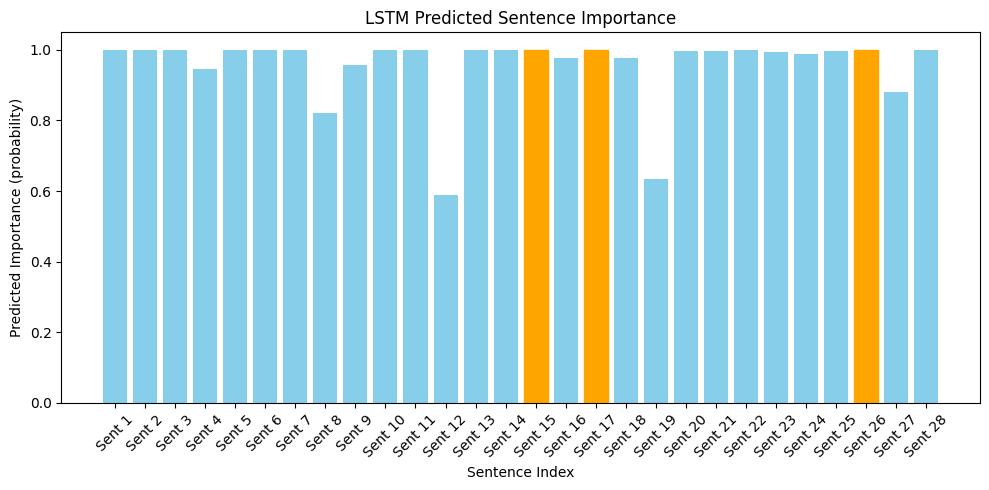


=== ML-LSTM EXTRACTIVE SUMMARY ===

Moreover, AI can automate administrative tasks such as grading and attendance tracking, allowing teachers to focus more on interactive and creative aspects of teaching.
Chatbots powered by natural language processing are available 247 to handle customer queries, while machine learning models monitor transactions for suspicious activity, reducing financial fraud.
In conclusion, AI is not just a technological trend—it is a paradigm shift that will shape the future of healthcare, education, transportation, business, and beyond.


In [ ]:


import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# ---------------------------
# 0. NLTK downloads (first run)
# ---------------------------
nltk.download("punkt")
nltk.download("stopwords")

from nltk.tokenize import sent_tokenize

# ---------------------------
# 1. Example document (replace with your own or load from file)
# ---------------------------
with open("/content/article2.txt", "r", encoding="utf-8") as f:
    text = f.read()

print("\n=== INPUT TEXT PREVIEW ===\n")
print(text[:500], "...\n")  # preview first 500 chars

# ---------------------------
# 2. Sentence tokenization
# ---------------------------
sentences = sent_tokenize(text)
print(f"Total sentences: {len(sentences)}")

# ---------------------------
# 3. Build tokenizer and sequences
# ---------------------------
# Tune num_words based on your corpus size; oov_token makes model robust to rare words
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# choose maxlen = the 90th percentile of sentence lengths or a fixed cap, here we pick 30
lengths = [len(s) for s in sequences]
maxlen = min(30, max(lengths)) if len(lengths) > 0 else 30
X = pad_sequences(sequences, maxlen=maxlen, padding="post", truncating="post")

vocab_size = min(5000, len(tokenizer.word_index) + 1)
print(f"Vocab size: {vocab_size}, maxlen: {maxlen}")

# ---------------------------
# 4. Pseudo-labeling (demo only)
# ---------------------------
# Simple heuristic: mark sentences longer than 10 words as 'important'
y = np.array([1 if len(s.split()) > 10 else 0 for s in sentences])
print("Pseudo labels:", y)

# ---------------------------
# 5. Train / Test split
# ---------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if len(set(y))>1 else None)

# ---------------------------
# 6. Build LSTM classifier
# ---------------------------
embedding_dim = 100
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

# ---------------------------
# 7. Train (small epochs for demo)
# ---------------------------
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=15, batch_size=8, verbose=1)

# ---------------------------
# 8. Predict importance scores for ALL sentences
# ---------------------------
y_scores = model.predict(X, verbose=0).flatten()  # probabilities in [0,1]

# ---------------------------
# 9. Select top-k sentences (preserve original order)
# ---------------------------
top_k = 3
top_indices = np.argsort(y_scores)[-top_k:]           # highest probs (unsorted)
top_indices_sorted = np.sort(top_indices)             # sort to retain document order
summary_sentences = [sentences[i] for i in top_indices_sorted]

# ---------------------------
# 10. Visualization: bar chart of sentence scores
# ---------------------------
plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(sentences)), y_scores, color="skyblue")
for idx in top_indices:
    bars[idx].set_color("orange")
plt.xticks(range(len(sentences)), [f"Sent {i+1}" for i in range(len(sentences))], rotation=45)
plt.xlabel("Sentence Index")
plt.ylabel("Predicted Importance (probability)")
plt.title("LSTM Predicted Sentence Importance")
plt.tight_layout()
plt.show()

# ---------------------------
# 11. Print summary
# ---------------------------
print("\n=== ML-LSTM EXTRACTIVE SUMMARY ===\n")
for s in summary_sentences:
    print(s.strip())
